# COMP 4030  / 6030 Final Exam

YOUR NAME: Matthew McMeans

Exam Policy:
+ Write your name above. Without your name, it's not your exam.
+ Export to HTML and upload the HTML.
+ No internet, no phones, no conversation.  Using other people's work results in failing the course.

In problems 2, 3, 4, 5 and 6, there are design requirements that you have to adhere to. For example, if the problem requires a recursive design, your design must be recursive.  The goal is to test your ability to apply the concepts and techniques that were taught.

Read the problem descriptions carefully.


--- 
**Problem 1** (20 points)

The program "prob1" belows calls the function "move" to complete its tasks.  The running time of "prob1" depends on the running time of "move".

Write down the running time equation of "prob1" and find its complexity (in terms of $\Theta$) for each of the following cases:

1. The running time complexity of "move" is $\Theta(n)$.
2. The running time complexity of "move" is $\Theta(n^2)$.



In [ ]:
def prob1(L):
    if len(L) <= 1: #a
        return L
    less, more = move(L)  #   # move returns two lists, each with n/2 numbers.
    A = prob1(less) 
    B = prob1(more) 
    return A + [L[0]] + B

### Part 1

T(n) = $\Theta(n) + 2T(n/2)$

d = 1 = $log_2 2$ = 1

$T(n) \in \Theta(n \log n)$

## Part 2

T(n) = $\Theta(n^2) + 2T(n/2)$

d = 2 > $log_2 2$ = 1

$T(n) \in \Theta(n^2)$

---
**Problem 2** (20 points)


Given a 2D grid, use a recursive design to implement the program **reachable(m, n, obstacles)** that determines if it's possible for a robot to move from position (m,n), which is the top right corner on the grid, to position (1,1), which is the bottom left corner of the grid.

From a given coordinate, the robot can only move in one of 3 ways: (i) left, (ii) down, or (iii) diagonal left/down.

For example, from position (5,4) for example, it can either move to (4,4), or to (5,3), or to (4,3).

The third parameter *obstacles* is a list of coordinates of obstacles, that the robot cannot move through.


Examples:
+ **reachable(7, 3, [(3,2), (5,1)])** should return True.

<img src="https://i.imgur.com/xNoHWaf.png">



On the other hand:
+ **reachable(7, 3, [(6,3), (6, 2), (5,1)])** should return False.


**You must use a recursive design to solve this problem.**



ANSWER

In [311]:
#
# Write your code here
#
def reachable(m, n, obstacles):
    if (m,n) in obstacles:
        return 0
    if m==1 and n==1:
        return 1
    if m==1:
        return reachable(m, n-1, obstacles)
    if n==1:
        return reachable(m-1, n, obstacles)
    if (reachable(m-1, n, obstacles) + reachable(m, n-1, obstacles) + reachable(m-1, n-1, obstacles)) > 0:
        return True
    else:
        return False
    


Test your code

In [313]:
reachable(7, 3, [(3,2), (5,1)]) 

True

In [314]:
reachable(7, 3, [(6,3), (6, 2), (5,1)]) 

False

---
**Problem 3** (10 points)

Assuming you have at least a mostly correct solution for problem 2 and that it repeatedly recalculate things.

Redesign your solution for problem 2 to use a table to store calculations in a way that does not recalculate things.

Note: if your solution to problem 2 already uses a table to store calculations and does not repeatedly calculate things, you can copy and paste it here.

ANSWER

In [138]:
#
# Write your code here
#
Table = {}
def reachable(m, n, obstacles):
    if (m,n) in Table:
        return False
    if (m,n) in obstacles:
        return 0
    if m==1 and n==1:
        return 1
    if m==1:
        return reachable(m, n-1, obstacles)
    if n==1:
        return reachable(m-1, n, obstacles)
    Table[m,n] = (reachable(m-1, n, obstacles) + reachable(m, n-1, obstacles) + reachable(m-1, n-1, obstacles))
    if Table[m,n] > 0:
        return True
    else:
        return False


In [139]:
reachable(7, 3, [(3,2), (5,1)]) 

True

In [140]:
reachable(7, 3, [(6,3), (6, 2), (5,1)]) 

False

---
**Problem 4** (20 points)

Recall that in assignment 6, the following program can find a solution that makes changes for a certain amount **X**, given coins **values**:
```
def make_change_with_solution(values, X):
    if X==0:
        return []
    if X<0:
        # not possible to make change for X
        return None
    for v in values:
        changes = make_change_with_solution(values, X-v)
        if changes is not None:
            changes.append(v)
            return changes
    return None
```

And that make_change_with_solution([5,7], 15) returns [5, 5, 5].

In this problem, you **must** modify this program to create a new program called **optimal_change**. This new program finds a solution that has the fewest number of coins.

For example, optimal_change([1,5,7,10,20], 21) returns [1, 20].  Note that there are many ways to make change for 21, e.g. [1,5,5,5,5], but [1,20] is the one with the fewest number of coins.

**Hint**: consider this analysis. In the for loop of **make_change_with_solution**, as soon as we can make change for X-v, we add v to the solution for X-v and return it.  This works for **make_change_with_solution** because we don't care how many coins there are in a solution; we only care about finding a solution. So, when we find it, we return it.

To find a solution with the fewest number of coins for **optimal_change**, we should not return a solution when we find one.  Instead, we should save all solutions and figure which has the fewest number of coins.


ANSWER:

In [325]:
#
# Write your code here
#
def optimal_change(values, X):
    if X==0:
        return []
    if X<0:
        # not possible to make change for X
        return None
    for v in values:
        changes = optimal_change(values, X-v)
        if changes is not None:
            changes.append(v)
            
            return changes
    return None

In [326]:
#
# Test your code
#
optimal_change([1,5,7,10,20], 21)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

---
**Problem 5** (20 points)

In this problem, you must use the backtracking template provided below to generate all cliques with at least 3 people in each of them in a network.

A clique is a group of friends who mutually know each other (i.e. there's an edge for each pair of node in the clique).

In the backtracking template called "generate" below, the parameter **is_valid** is a function that checks if a solution is valid. In this problem, you must pass an **is_valid** function (together with other parameters) to "generate" all cliques with at least 3 people in each of them.  In this problem, a valid solution is a clique with at least 3 people.

Specifically, define a function called **is_a_clique** and use it as a check for valid solutions and generate all cliques with at least 3 people in each of them.  

In [85]:

def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]]
     
def generate(solution, i, g, is_valid):
    if i==len(solution):
        if is_valid(solution, g):
            print(get_nodes(solution))
    else:
        for possibility in [True, False]:
            solution[i] = possibility
            generate(solution, i+1, g, is_valid)


ANSWER

In [291]:
#
# Use this graph to test your solution
#
import networkx as nx
G = nx.gnp_random_graph(n=5, p=0.8, seed=24)


In [327]:
#
# Write your code here to solve this problem
#
def is_a_clique(solution, g):
    the_nodes = [i for i in range(len(solution)) if solution[i]==True]
    if len(the_nodes)!=3:
        return False
    a, b, c = the_nodes
    return (a,b) in g.edges and (b,c) in g.edges and (a,c) in g.edges

  
def possibilities(solution, i, g):
    the_nodes = []
    for j in range(i):
        if solution[j]==True:
            the_nodes.append(j)
    
    for v in the_nodes:
        if (i,v) not in g.edges:
            return [False]
    return [True,False]

def all_cliques(g):
    solution = [None]*len(g)
    generate(solution, 0, possibilities, g)

In [328]:
#
# Now use your function to generate all cliques
#
generate([None]*len(G), 0, G, is_a_clique)

TypeError: generate() missing 1 required positional argument: 'possibilities'

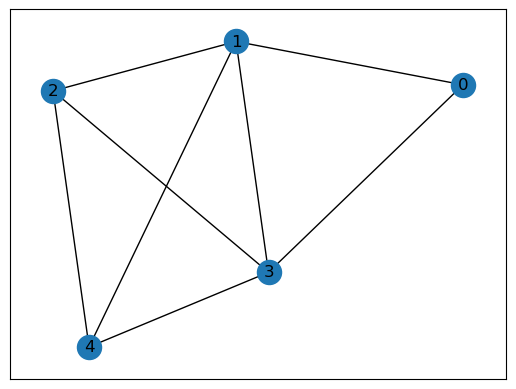

In [84]:
nx.draw_networkx(G, with_labels=True)

This network has 5 cliques with at least 3 people in each of them:
```
[0, 1, 3]
[1, 2, 3, 4]
[1, 2, 3]
[1, 2, 4]
[1, 3, 4]
[2, 3, 4]
```

---
**Problem 6** (10 points)

In the previous problem's backtracking template "generate", there're 2 possibilites for solution[i] (True or False), i.e. node i is either selected or not selected.


In this problem, "generate" has an extra parameter, "possibilities", which is a function that returns all possibilities to set solution[i].


In this problem, you must design a function called **possibilities_for_only_red_cliques**.

After you define this function, use it to generate cliques that contain only red nodes.

In [ ]:
     
def generate(solution, i, g, is_valid, possibilities):
    if i==len(solution):
        if is_valid(solution, g):
            print(get_nodes(solution))
    else:
        for possibility in possibilities(solution, i, g):
            solution[i] = possibility
            generate(solution, i+1, g, is_valid, possibilities)


In [ ]:
#
# Write your code here to solve this problem
#
def possibilities_for_only_red_cliques(solution, i, g):
    pass


You can test your solution with the code below.

In [ ]:
# This code is for generating a random network with randomly colored nodes.
# You don't need to understand it.
#
import networkx as nx
import random

def randomly_colored_graph(n, pair_prob=0.5, color_prob=0.25, seed=2022):
    random.seed(seed)
    G = nx.Graph()
    for i in range(n):
        if random.random() < color_prob:
            G.add_node(i, color='red')
        else:
            G.add_node(i, color='white')
    for i in range(n):
        for j in range(i+1,n):
            if random.random() < pair_prob:
                G.add_edge(i,j)
    return G


def draw_colored_graph(G):
    nx.draw_networkx(
        G, 
        with_labels=True, 
        node_color=[ G.nodes[i]['color'] for i in G.nodes ],
    )


Use this network G2 below for testing. 

The color of node 4 is red


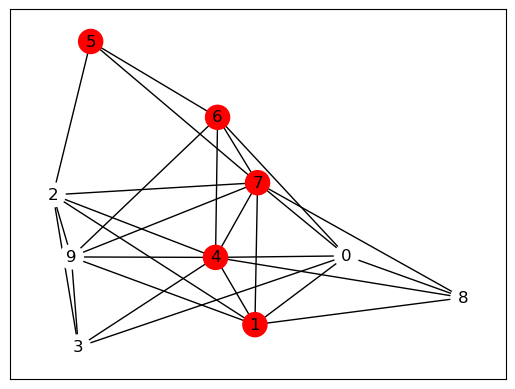

In [301]:
G2 = randomly_colored_graph(10, pair_prob=0.6, color_prob=0.5, seed=78)
draw_colored_graph(G2)
print('The color of node 4 is', G2.nodes[4]['color'])

In [133]:
#
# Test your code. This should print out only red cliques.
#

# generate([None]*len(G), 0, G, is_a_clique, possibilities_for_only_red_cliques)